# Model Validation
The objective of this project is to verify the accuracy of the model by evaluating its performance with a fresh and unfamiliar dataset, thereby understanding its ability to generalize with new data. This evaluation will be conducted using both Ersilia-eos6oli and SolTranNet.


Importing and Installing all necessary libraries

In [41]:
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore


In [ ]:
!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX


In [ ]:
!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
import sys

_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [44]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
input_folder = "/content/drive/MyDrive/Ersilia"

In [46]:
# specifying my output folder
output_folder = "/content/drive/MyDrive/Ersilia"

In [47]:
model_name = "eos6oli"

# Fetching the Model


In [48]:
# Fetching the model
import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")


⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
[]
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:51473
   PID: 34106
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
⛔ Model eos6oli closed
👍 Model eos6oli fetched successfully!
Time taken: 204.99 seconds


# Serving the Model


In [49]:
# Serving the model

# returns available APIs (calculate or predict)

!ersilia serve $model_name


sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:60403
   PID: 34359
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


# Checking for data leakage
Reading in the training dataset used by authors



In [50]:
# specifying the name of my input csv file

input_filename = "aqsol"


In [51]:
# specify the SMILES column name
smiles_column = "smiles"


In [52]:
# Extracting SMILES to a list
import pandas as pd

path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df1 = pd.read_csv(path)
training_smiles = df1[smi_col].tolist()

print("The training dataset contains" + " " + str(len(training_smiles)) + " " + "SMILES")


The training dataset contains 9982 SMILES


# Reading in external dataset with sufficient experimental results


In [53]:
# specify the name of my input csv file

input_filename = "Aqua_stand"


In [54]:
# specify the SMILES column name
smiles_column = "smiles"


In [55]:
#convert smiles column to a list
path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path, encoding='latin1')
external_smiles = df[smi_col].tolist()

print("The external dataset contains" + " " + str(len(external_smiles)) + " " + "SMILES")


The external dataset contains 1310 SMILES


In [56]:
df.tail(20)

,smiles,logS,weight
1290,c1ccc2c(c1)sc1ccccc12,-4.38,1.0
1291,c1ccc2c3c(ccc2c1)-c1cccc2cccc-3c12,-8.00,1.0
1292,c1ccc2cc3c(cc2c1)-c1cccc2cccc-3c12,-8.49,1.0
1293,c1ccc2cc3cc4ccccc4cc3cc2c1,-8.60,1.0
1294,c1ccc2cc3ccccc3cc2c1,-6.35,1.0
1295,c1ccc2ccccc2c1,-3.60,1.0
1296,c1ccc2cnccc2c1,-1.45,1.0
1297,c1ccc2nc(-c3ccc4ccccc4n3)ccc2c1,-5.40,1.0
1298,c1ccc2nc3ccccc3cc2c1,-3.67,1.0
1299,c1ccc2ncccc2c1,-1.30,1.0


In [57]:
#checking for NULL values
df.isnull().sum()

smiles    0
logS      0
weight    0
dtype: int64

Comparing the training and external dataset to check for data leakage


In [58]:
def check_for_leaks(external_smiles, training_smiles):
    leaks = []
    for smile in external_smiles:
        if smile in training_smiles:
            print(f"The molecule {smile} is a leak.")
            leaks.append(smile)
    return leaks

leak_items = check_for_leaks(external_smiles, training_smiles)
total_leaks = len(leak_items)
print(f"Total number of leaks found: {total_leaks}")

if not leak_items:
    print("No leaks found.")



The molecule BrC(Br)(Br)Br is a leak.
The molecule BrC(Br)Br is a leak.
The molecule BrC1CCCCC1 is a leak.
The molecule BrC=CBr is a leak.
The molecule BrCBr is a leak.
The molecule BrCCBr is a leak.
The molecule BrCCCBr is a leak.
The molecule Brc1ccc(Br)c(Br)c1 is a leak.
The molecule Brc1ccc(Br)cc1 is a leak.
The molecule Brc1ccc2ccccc2c1 is a leak.
The molecule Brc1cccc(Br)c1 is a leak.
The molecule Brc1cccc(Br)c1Br is a leak.
The molecule Brc1cccc2ccccc12 is a leak.
The molecule Brc1ccccc1 is a leak.
The molecule Brc1ccccc1Br is a leak.
The molecule C1CCCC1 is a leak.
The molecule C1CCCCC1 is a leak.
The molecule C1CCCCCC1 is a leak.
The molecule C1CCCCCCC1 is a leak.
The molecule C1CCNCC1 is a leak.
The molecule C1CCOCC1 is a leak.
The molecule C1CNCCN1 is a leak.
The molecule C1COCCN1 is a leak.
The molecule C=CC#N is a leak.
The molecule C=CC=C is a leak.
The molecule C=CC=O is a leak.
The molecule C=CCC1(CC=C)C(=O)NC(=O)NC1=O is a leak.
The molecule C=CCC=C is a leak.
The mole

Deleting the Leaks


In [60]:
# Check if 'smiles' values in external_df is in the list of leak_items
mask = df['smiles'].isin(leak_items)

# Invert the mask to keep rows where the 'smiles' values is not a leak
No_Leaks_df = df[~mask]


In [61]:
No_Leaks_df


,smiles,logS,weight
15,C#CC(C)N(C)C(=O)Nc1ccc(Cl)cc1,-3.90,1.0
16,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3CCC21C,-5.66,1.0
17,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,-4.57,1.0
18,C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C,-4.30,1.0
19,C#CC1(OC(C)=O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,-4.79,1.0
...,...,...,...
1303,c1ccncc1,0.76,1.0
1305,c1ccoc1,-0.82,1.0
1306,c1ccsc1,-1.45,1.0
1307,c1cnc2c(c1)ccc1ncccc12,-2.68,1.0


 Checking if SMILES are standardized using for loop

In [62]:
import rdkit
from rdkit import Chem

def is_smiles(smiles):
  try:
    mol=Chem.MolFromSmiles(smiles)
    if mol is None:
      return False
    return True
  except:
    return False


In [64]:
for i in No_Leaks_df['smiles']:
  if is_smiles(i):
    print("Valid SMILES")
  else:
    print("Not a valid SMILES")


Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES

In [72]:
# Function to convert SMILES to InChIKey
def smiles_to_inchikey(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    inchi = Chem.MolToInchi(mol)
    inchi_key = Chem.InchiToInchiKey(inchi)
    return inchi_key



In [77]:
No_Leaks_df.to_csv('/content/drive/MyDrive/Ersilia/NoLeaks_data.csv', index=False)


In [79]:
No_Leaks_df.loc[:, 'inchikey'] = No_Leaks_df['smiles'].apply(smiles_to_inchikey)


In [80]:
No_Leaks_df

,smiles,logS,weight,inchikey
15,C#CC(C)N(C)C(=O)Nc1ccc(Cl)cc1,-3.90,1.0,BYYMILHAKOURNM-UHFFFAOYSA-N
16,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3CCC21C,-5.66,1.0,CHNXZKVNWQUJIB-UHFFFAOYSA-N
17,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,-4.57,1.0,VIKNJXKGJWUCNN-UHFFFAOYSA-N
18,C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C,-4.30,1.0,BFPYWIDHMRZLRN-UHFFFAOYSA-N
19,C#CC1(OC(C)=O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,-4.79,1.0,IMONTRJLAWHYGT-UHFFFAOYSA-N
...,...,...,...,...
1303,c1ccncc1,0.76,1.0,JUJWROOIHBZHMG-UHFFFAOYSA-N
1305,c1ccoc1,-0.82,1.0,YLQBMQCUIZJEEH-UHFFFAOYSA-N
1306,c1ccsc1,-1.45,1.0,YTPLMLYBLZKORZ-UHFFFAOYSA-N
1307,c1cnc2c(c1)ccc1ncccc12,-2.68,1.0,OZKOMUDCMCEDTM-UHFFFAOYSA-N


Reading in the No_leaks Dataset from Drive


In [81]:
# specify the name of my input csv file

input_filename = "No_Leaks_df"


In [90]:
# specify the SMILES column name
smiles_column = "SMILES"


In [104]:
#Running predictions
api = "calculate"

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()



Successful 👍! Time taken: 45.41 seconds


In [94]:
# Check the results

print(output.head())


                           key                                        input  \
0  BYYMILHAKOURNM-UHFFFAOYSA-N                C#CC(C)N(C)C(=O)Nc1ccc(Cl)cc1   
1  CHNXZKVNWQUJIB-UHFFFAOYSA-N     C#CC1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3CCC21C   
2  VIKNJXKGJWUCNN-UHFFFAOYSA-N        C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C   
3  BFPYWIDHMRZLRN-UHFFFAOYSA-N          C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C   
4  IMONTRJLAWHYGT-UHFFFAOYSA-N  C#CC1(OC(C)=O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C   

   solubility  
0      -3.441  
1      -4.725  
2      -4.412  
3      -4.306  
4      -5.915  


In [95]:
#Save the results in Google Drive

output.to_csv("/content/drive/MyDrive/Ersilia/ErsiliaValidation.csv", index=False)


In [96]:
ErsiliaEvaluation=pd.read_csv("/content/drive/MyDrive/Ersilia/ErsiliaValidation.csv")
ErsiliaEvaluation.head()

,key,input,solubility
0,BYYMILHAKOURNM-UHFFFAOYSA-N,C#CC(C)N(C)C(=O)Nc1ccc(Cl)cc1,-3.441
1,CHNXZKVNWQUJIB-UHFFFAOYSA-N,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3CCC21C,-4.725
2,VIKNJXKGJWUCNN-UHFFFAOYSA-N,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,-4.412
3,BFPYWIDHMRZLRN-UHFFFAOYSA-N,C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C,-4.306
4,IMONTRJLAWHYGT-UHFFFAOYSA-N,C#CC1(OC(C)=O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C,-5.915


In [107]:
#matching outputs with smiles and returning the true solubility values
# Merging dataframes
merged_predictions = pd.merge(ErsiliaEvaluation, df[['smiles', 'logS']], how='left', left_on='input', right_on='smiles')



In [108]:
# Renaming and dropping redundant columns
merged_predictions = merged_predictions.rename(columns={'logS': 'experimental_solubility'})
merged_predictions = merged_predictions.rename(columns={'solubility': 'predicted_solubility'})
merged_predictions = merged_predictions.drop(columns='smiles', axis=1)


In [109]:
# Displaying the result
print(merged_predictions)


                             key                                        input  \
0    BYYMILHAKOURNM-UHFFFAOYSA-N                C#CC(C)N(C)C(=O)Nc1ccc(Cl)cc1   
1    CHNXZKVNWQUJIB-UHFFFAOYSA-N     C#CC1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3CCC21C   
2    VIKNJXKGJWUCNN-UHFFFAOYSA-N        C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C   
3    BFPYWIDHMRZLRN-UHFFFAOYSA-N          C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C   
4    IMONTRJLAWHYGT-UHFFFAOYSA-N  C#CC1(OC(C)=O)CCC2C3CCC4=CC(=O)CCC4C3CCC21C   
..                           ...                                          ...   
803  JUJWROOIHBZHMG-UHFFFAOYSA-N                                     c1ccncc1   
804  YLQBMQCUIZJEEH-UHFFFAOYSA-N                                      c1ccoc1   
805  YTPLMLYBLZKORZ-UHFFFAOYSA-N                                      c1ccsc1   
806  OZKOMUDCMCEDTM-UHFFFAOYSA-N                       c1cnc2c(c1)ccc1ncccc12   
807  CPNGPNLZQNNVQM-UHFFFAOYSA-N                               c1cnc2ncncc2n1   

     predicted_solubility  

In [110]:
merged_predictions.to_csv("/content/drive/MyDrive/Ersilia/merged_ErsiliaValidation.csv", index=False)


In [111]:
from sklearn.metrics import r2_score


r2 = r2_score(merged_predictions['experimental_solubility'], merged_predictions['predicted_solubility'])
print(f'R-squared (R2): {r2:.2f}')


R-squared (R2): 0.88


# PCA of Morgan Fingerprints


In [112]:
No_Leaks_df=pd.read_csv("/content/drive/MyDrive/Ersilia/NoLeaks_data.csv")


In [113]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   smiles  794 non-null    object 
 1   logS    794 non-null    float64
 2   weight  794 non-null    float64
dtypes: float64(2), object(1)
memory usage: 18.7+ KB


In [114]:
No_Leaks_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   smiles  794 non-null    object 
 1   logS    794 non-null    float64
 2   weight  794 non-null    float64
dtypes: float64(2), object(1)
memory usage: 18.7+ KB


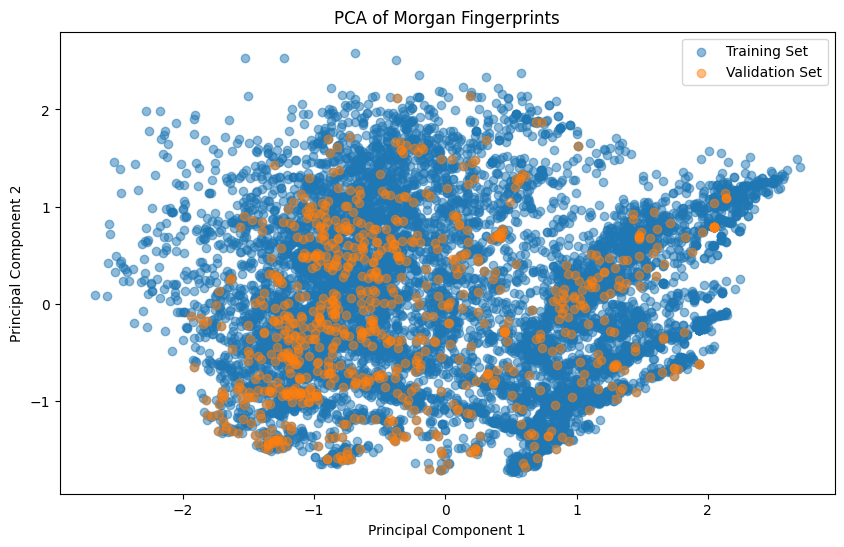

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import ConvertToNumpyArray

# Function to generate Morgan fingerprints for a list of molecules
def generate_morgan_fingerprints(smiles_list, radius=2, n_bits=2048):
    mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
    fingerprints = []
    for mol in mols:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
        arr = np.zeros((1,), dtype=int)  # Corrected here
        ConvertToNumpyArray(fp, arr)
        fingerprints.append(arr)

    return np.array(fingerprints)


# Convert molecules to Morgan fingerprints
training_fingerprints = generate_morgan_fingerprints(df1['smiles'])
validation_fingerprints = generate_morgan_fingerprints(No_Leaks_df['smiles'])


# Concatenate fingerprints from both sets
all_fingerprints = np.concatenate((training_fingerprints, validation_fingerprints))

# Apply PCA
pca = PCA(n_components=2)
pca.fit(all_fingerprints)
transformed_training = pca.transform(training_fingerprints)
transformed_validation = pca.transform(validation_fingerprints)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(transformed_training[:, 0], transformed_training[:, 1], label='Training Set', alpha=0.5)
plt.scatter(transformed_validation[:, 0], transformed_validation[:, 1], label='Validation Set', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Morgan Fingerprints')
plt.legend()

plt.savefig('/content/drive/MyDrive/Ersilia/PCAMorganFingerprints_plot.png')
plt.show()



The scatter plot generated from the Principal Component Analysis (PCA) of Morgan fingerprints represents the distribution and clustering of molecules in both the training and validation sets. The plot demonstrates how the molecules are grouped and separated based on their molecular features, as captured by the Morgan fingerprints.

From the scatter plot, it shows there are some overlap between the training and validation sets, indicating that certain molecular characteristics are shared between these sets. However, there are also distinct clusters, suggesting differences in the molecular properties of the molecules in each set.
In summary, the PCA analysis provides valuable insights into the relationships, similaritie and differences between molecules in the dataset, aiding in understanding how the model generalizes and performs across different sets of data.






